In [1]:
import time
import sys
import os
import numpy as np
import networkx as nx
import random
import time
from matplotlib import pyplot as plt

sys.path.insert(0, os.path.join(os.getcwd(), "..", "cpp_prim", "x64", "Release"))
sys.path.insert(0, os.path.join(os.getcwd(), "..", "py_prim"))
import py_prim
import cpp_prim

In [2]:
def generate_complete_graph(nodesNum):
    graph = nx.complete_graph(nodesNum)
    for (start, end) in graph.edges:
        graph.edges[start, end]['weight'] = random.randrange(1, 100)
    return graph

def generate_random_tree(nodesNum):
    graph = nx.random_powerlaw_tree(nodesNum, tries=10000)
    for (start, end) in graph.edges:
        graph.edges[start, end]['weight'] = random.randrange(1, 100)
    return graph

def extract_adjacency_matrix(nx_graph):
    adjacency_matrix = nx.to_numpy_array(nx_graph, dtype='int32').tolist()
    return adjacency_matrix

In [3]:
def test_on_complete_graph(prim_impl, nodesRange = 300, step = 10):
    elapsed_time = []
    nodes_num = []
    for nodes in list(range(2, nodesRange, step)):
        print(f"Complete graph with {nodes} nodes.", end="\r")
        nodes_num.append(nodes)
        graph = generate_complete_graph(nodes)
        adjacency_matrix = extract_adjacency_matrix(graph)
        start_time = time.time()
        prim_impl.run_algorithm(adjacency_matrix)
        elapsed_time.append(time.time() - start_time)
    return elapsed_time, nodes_num

def test_on_tree(prim_impl, nodesRange = 300, step = 10):
    elapsed_time = []
    nodes_num = []
    for nodes in list(range(2, nodesRange, step)):
        print(f"Random tree with {nodes} nodes.", end="\r")
        nodes_num.append(nodes)
        graph = generate_random_tree(nodes)
        adjacency_matrix = extract_adjacency_matrix(graph)
        start_time = time.time()
        prim_impl.run_algorithm(adjacency_matrix)
        elapsed_time.append(time.time() - start_time)
    return elapsed_time, nodes_num

In [4]:
def plot_timing(ax, cpp_time, py_time, nodes, title=""):
    ax.plot(nodes, cpp_time, label='C++')
    ax.plot(nodes, py_time, label='Python')
    ax.set_xlabel('Number of nodes in the graph')
    ax.set_ylabel('Time')
    ax.set_title(title)
    ax.legend()

In [5]:
cpp_complete_time, cpp_complete_nodes = test_on_complete_graph(cpp_prim)

In [6]:
py_complete_time, py_complete_nodes = test_on_complete_graph(py_prim)

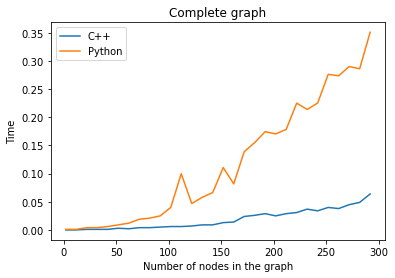

In [7]:
fig, ax = plt.subplots(1, 1)
plot_timing(ax, cpp_complete_time, py_complete_time, cpp_complete_nodes, "Complete graph")

In [8]:
cpp_tree_time, cpp_tree_nodes = test_on_tree(cpp_prim)

In [9]:
py_tree_time, py_tree_nodes = test_on_tree(py_prim)

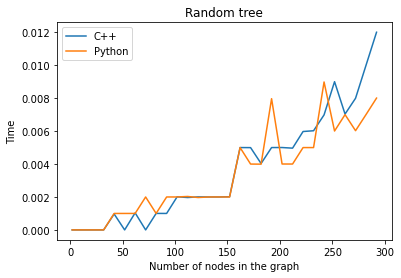

In [10]:
fig, ax = plt.subplots(1, 1)
plot_timing(ax, cpp_tree_time, py_tree_time, cpp_tree_nodes, "Random tree")